In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
amd= yf.Ticker('AMD').history(period='5mo')

In [5]:
closing_prices_amd= amd.Close

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
amzn= yf.Ticker('AMZN').history(period='5mo')

In [8]:
closing_prices_amzn= amzn.Close

In [9]:
ratio1= closing_prices_amd/closing_prices_amzn

In [10]:
adfuller(ratio1)

(-0.9123268784739659,
 0.7838858991336528,
 0,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 -398.5245989075345)

In [13]:
ratio2= closing_prices_amzn/closing_prices_amd

In [14]:
adfuller(ratio2)

(-1.2423560045776316,
 0.6551151505141295,
 0,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 -342.9013560599201)

In [40]:
aapl= yf.Ticker('AAPL').history(period='5mo')

In [41]:
closing_prices_aapl= aapl.Close

In [42]:
googl= yf.Ticker('GOOGL').history(period='5mo')

In [43]:
closing_prices_googl = googl.Close

In [44]:
ratio= closing_prices_aapl/closing_prices_googl

In [45]:
adfuller(ratio)

(-1.788066120669919,
 0.386402422229868,
 1,
 103,
 {'1%': -3.4954932834550623,
  '5%': -2.8900369024285117,
  '10%': -2.5819706975209726},
 -398.06072160044926)

In [46]:
print('Ratio is Non Stationary')

Ratio is Non Stationary


In [47]:
ratio2= closing_prices_googl/closing_prices_aapl

In [48]:
adfuller(ratio2)

(-1.548760539663039,
 0.5092672634107032,
 0,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 -547.820363276664)

In [49]:
print('Ratio is Non Stationary')

Ratio is Non Stationary


In [50]:
import matplotlib.pyplot as plt

In [51]:
aapl= yf.Ticker('AAPL')
googl= yf.Ticker('GOOGL')

In [52]:
aapl_info= yf.download('AAPL', start='2022-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [53]:
googl_info= yf.download('GOOGL', start='2022-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [54]:
aapl_close= aapl_info['Close']

In [55]:
googl_close= googl_info['Close']

In [56]:
ratio= aapl_close/googl_close

In [57]:
mean= np.mean(ratio)
std= np.std(ratio)

In [58]:
z_scores= (ratio-mean)/std

In [59]:
z_scores

Date
2022-01-03   -0.896787
2022-01-04   -0.987200
2022-01-05   -0.777707
2022-01-06   -0.952225
2022-01-07   -0.886418
                ...   
2022-12-23    0.956644
2022-12-27    1.041414
2022-12-28    0.852379
2022-12-29    0.853270
2022-12-30    0.913934
Name: Close, Length: 251, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

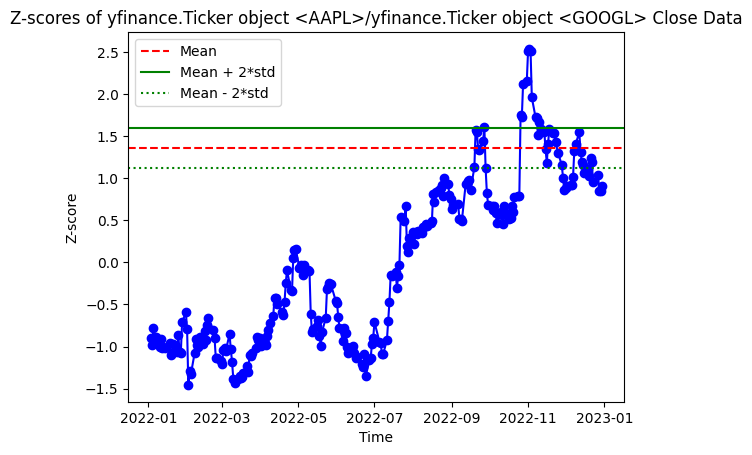

In [60]:
plt.plot(z_scores, marker='o', linestyle='-', color='b')
plt.axhline(mean, linestyle='--', color='r', label='Mean')
plt.axhline(mean + 2*std, linestyle='-', color='g', label='Mean + 2*std')
plt.axhline(mean - 2*std, linestyle=':', color='g', label='Mean - 2*std')
plt.xlabel('Time')
plt.ylabel('Z-score')
plt.title(f'Z-scores of {aapl}/{googl} Close Data')
plt.legend()
plt.show

In [61]:
amzn= yf.Ticker('AMZN')
amd= yf.Ticker('AMD')

In [62]:
amzn_info= yf.download('AMZN', start='2022-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [63]:
amd_info= yf.download('AMD', start='2022-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [64]:
close_amzn= amzn_info['Close']
close_amd= amd_info['Close']

In [65]:
ratio= close_amzn/close_amd

In [66]:
adfuller(ratio)

(-1.998213858480234,
 0.28735680873269764,
 3,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 -805.9305980686718)

In [67]:
mean= np.mean(ratio)
std= np.std(ratio)

In [68]:
z_scores= (ratio-mean)/std

In [69]:
z_scores

Date
2022-01-03   -1.342795
2022-01-04   -1.219235
2022-01-05   -0.992681
2022-01-06   -1.034936
2022-01-07   -0.876104
                ...   
2022-12-23   -0.445059
2022-12-27   -0.487409
2022-12-28   -0.510514
2022-12-29   -0.553617
2022-12-30   -0.562141
Name: Close, Length: 251, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

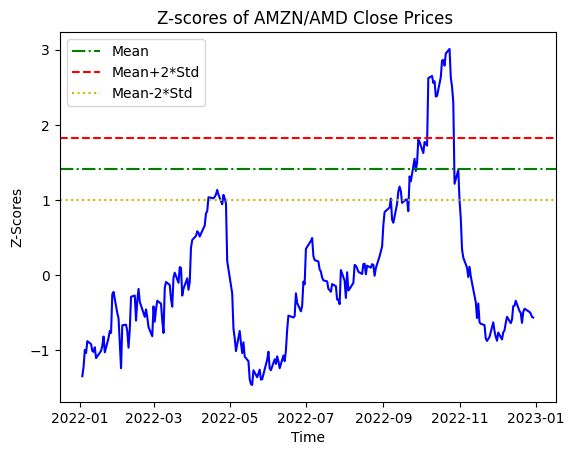

In [70]:
plt.plot(z_scores, linestyle='-', color='b')
plt.axhline(mean, linestyle='-.', color='g', label='Mean')
plt.axhline(mean+2*std, linestyle='--', color='r', label='Mean+2*Std')
plt.axhline(mean-2*std, linestyle=':', color='y', label='Mean-2*Std')
plt.xlabel('Time')
plt.ylabel('Z-Scores')
plt.title(f'Z-scores of AMZN/AMD Close Prices ')
plt.legend()
plt.show




In [71]:
amzn_info= yf.download('AMZN', start='2022-05-01', end='2023-04-30')

[*********************100%***********************]  1 of 1 completed


In [72]:
amzn_info['Daily_Return'] = amzn_info['Close'].pct_change()

In [73]:
avg_daily_return = amzn_info['Daily_Return'].mean()
std_daily_return = amzn_info['Daily_Return'].std()

In [74]:
risk_free_rate = 0.0

In [75]:
sharpe_ratio= (avg_daily_return-risk_free_rate)/std_daily_return

In [76]:
sharpe_ratio

-0.008693294904519623

In [77]:
#Sharpe Ratio is negative so this stock is in loss

In [78]:
amzn= yf.Ticker('AMZN').history(period='2y')

In [79]:
amzn_close= amzn.Close

In [80]:
amzn['MA_15'] = amzn['Close'].rolling(window=15).mean()
amzn['MA_50'] = amzn['Close'].rolling(window=50).mean()

In [81]:
amzn['MA_15']

Date
2021-05-27 00:00:00-04:00           NaN
2021-05-28 00:00:00-04:00           NaN
2021-06-01 00:00:00-04:00           NaN
2021-06-02 00:00:00-04:00           NaN
2021-06-03 00:00:00-04:00           NaN
                                ...    
2023-05-22 00:00:00-04:00    110.102001
2023-05-23 00:00:00-04:00    110.859334
2023-05-24 00:00:00-04:00    111.732668
2023-05-25 00:00:00-04:00    112.466001
2023-05-26 00:00:00-04:00    113.429334
Name: MA_15, Length: 504, dtype: float64

In [82]:
golden_cross_dates = amzn[(amzn['MA_15'] > amzn['MA_50']) & (amzn['MA_15'].shift(1) < amzn['MA_50'].shift(1))]
death_cross_dates = amzn[(amzn['MA_15'] <amzn['MA_50']) & (amzn['MA_15'].shift(1) > amzn['MA_50'].shift(1))]

In [83]:
golden_cross_dates

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_15,MA_50
Date,,,,,,,,,
2021-09-16 00:00:00-04:00,172.998001,174.627502,172.307007,174.412003,51672000,0.0,0.0,172.791534,172.783521
2021-11-03 00:00:00-04:00,165.449997,169.746002,164.876007,169.199997,67944000,0.0,0.0,169.027267,168.861201
2022-03-25 00:00:00-04:00,164.000000,165.368500,162.250000,164.773499,49032000,0.0,0.0,152.274202,151.844200
2022-07-20 00:00:00-04:00,118.620003,123.480003,118.320000,122.769997,71268300,0.0,0.0,112.978667,112.114950
2023-01-23 00:00:00-05:00,97.559998,97.779999,95.860001,97.519997,76501100,0.0,0.0,91.322000,91.114400
2023-03-31 00:00:00-04:00,102.160004,103.489998,101.949997,103.290001,56750300,0.0,0.0,98.478666,97.981200


In [84]:
death_cross_dates

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_15,MA_50
Date,,,,,,,,,
2021-08-11 00:00:00-04:00,166.572495,166.884995,163.889496,164.605499,58944000,0.0,0.0,173.022467,173.535469
2021-10-01 00:00:00-04:00,164.450500,165.458496,162.796997,164.162994,56712000,0.0,0.0,169.486101,169.678971
2021-12-20 00:00:00-05:00,166.850006,167.874496,165.600006,167.078995,57372000,0.0,0.0,171.794169,172.372401
2022-04-26 00:00:00-04:00,144.800003,144.856003,138.929504,139.391006,77530000,0.0,0.0,152.481500,153.966920
2022-09-16 00:00:00-04:00,122.779999,123.870003,120.699997,123.529999,115667800,0.0,0.0,128.778666,129.275600
2023-03-09 00:00:00-05:00,93.680000,96.209999,92.180000,92.250000,56218700,0.0,0.0,94.380000,95.105000
